# This Notebook Contains the main prototype for the similarity test used in the web app

In [1]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [40]:
dict_player[player_id].head().keys()

Index(['map', 'date', 'team_id', 'team_name', 'player_id', 'player_name',
       'kills', 'hs_kills', 'assists', 'flash_assists', 'deaths', 'KAST',
       'kill_death_diff', 'ADR', 'first_kills_diff', 'rating',
       'kills_per_round', 'deaths_per_round', 'impact', 'team_score',
       'op_score', 'win', 'team_rank', 'prize'],
      dtype='object')

In [3]:
# First we take all the players in ranked teams from 2019
player_aux = {}

for player_id in dict_player:
    df_aux = dict_player[player_id][ dict_player[player_id]['date']>datetime(2019,1,1) ]

    if any( df_aux['team_rank']>0 ):
        player_aux[player_id] = {}

        prize = sum( df_aux['prize'] )
        if prize > 0.0:
            player_aux[player_id]['prize'] = np.log( prize ) / 12.0
        else:
            player_aux[player_id]['prize'] = 0.0

        player_aux[player_id]['rating']           = df_aux['rating'].mean()
        player_aux[player_id]['hs_perc']          = (df_aux['hs_kills']/df_aux['kills']).mean()
        player_aux[player_id]['kills_per_round']  = df_aux['kills_per_round'].mean()
        player_aux[player_id]['deaths_per_round'] = df_aux['deaths_per_round'].mean()
        player_aux[player_id]['ADR']              = df_aux['ADR'].mean() / 100.0

        player_aux[player_id]['KAST']              = df_aux['KAST'].mean() / 100.0
        player_aux[player_id]['score_dif']         = (df_aux['team_score']-df_aux['op_score']).mean()
        player_aux[player_id]['win_rate']          = df_aux['win'].mean()
        player_aux[player_id]['assists_per_round'] = ( (df_aux['assists'])/(df_aux['team_score']+df_aux['op_score']) ).mean()
        player_aux[player_id]['flash_per_round']   = ( (df_aux['flash_assists'])/(df_aux['team_score']+df_aux['op_score']) ).mean()


In [4]:
df = pd.DataFrame.from_dict(player_aux,orient='index')
df.head()

,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,KAST,score_dif,win_rate,assists_per_round,flash_per_round
39,0.882635,0.934453,0.492072,0.596641,0.692578,0.683617,0.655773,-0.429688,0.453125,0.159226,0.040913
884,0.875707,0.926379,0.418579,0.564914,0.657241,0.667767,0.672448,0.189655,0.517241,0.216049,0.064755
29,0.922176,1.105489,0.484255,0.721033,0.652391,0.759582,0.699255,0.054348,0.467391,0.142302,0.035515
7169,0.992370,1.026494,0.501223,0.634741,0.630815,0.675351,0.718192,2.512915,0.664207,0.143159,0.029104
629,0.717953,1.081700,0.326335,0.696300,0.688000,0.742400,0.691110,-0.610000,0.430000,0.160405,0.031409


In [6]:
# Using Euclidean distance
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')
df = df.fillna(0)

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df.copy()
df_dist['dist'] = df['rating']*0.0
for column in df:
    df_dist[column] = (df[column]-df.loc[player_id][column])**2
    df_dist['dist'] = df_dist['dist'] + df_dist[column]

df_dist = df_dist.sort_values('dist',ascending=True)

for player_id in df_dist.index[:10]:
    print( dict_player[player_id].player_name.unique() )


df_aux = df[ df.index.isin( df_dist.index.values ) ]
df_aux.sort_values('prize',ascending=False)

df_aux.head()

['s1mple']
['splashske']
['vsm']
['Brehze']
['ropz']
['floppy']
['mitsuha']
['dezon']
['electronic']
['d4v41']


,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,KAST,score_dif,win_rate,assists_per_round,flash_per_round
39,1.459533,-0.506335,0.273230,-0.544951,-0.054281,-0.378519,-0.461250,0.242073,0.117483,-0.134445,0.051596
884,1.435347,-0.564209,-0.554913,-0.880279,-0.616009,-0.559453,-0.117133,0.457451,0.486054,1.511447,1.171501
29,1.597576,0.719661,0.185143,0.769775,-0.693108,0.488644,0.436083,0.410397,0.199492,-0.624652,-0.201984
7169,1.842628,0.153423,0.376341,-0.142263,-1.036097,-0.472886,0.826872,1.265370,1.330878,-0.599826,-0.503097
629,0.884610,0.549139,-1.594336,0.508371,-0.127057,0.292510,0.267986,0.179369,-0.015450,-0.100285,-0.394848


In [7]:
df.keys()

Index(['prize', 'rating', 'hs_perc', 'kills_per_round', 'deaths_per_round',
       'ADR', 'KAST', 'score_dif', 'win_rate', 'assists_per_round',
       'flash_per_round'],
      dtype='object')

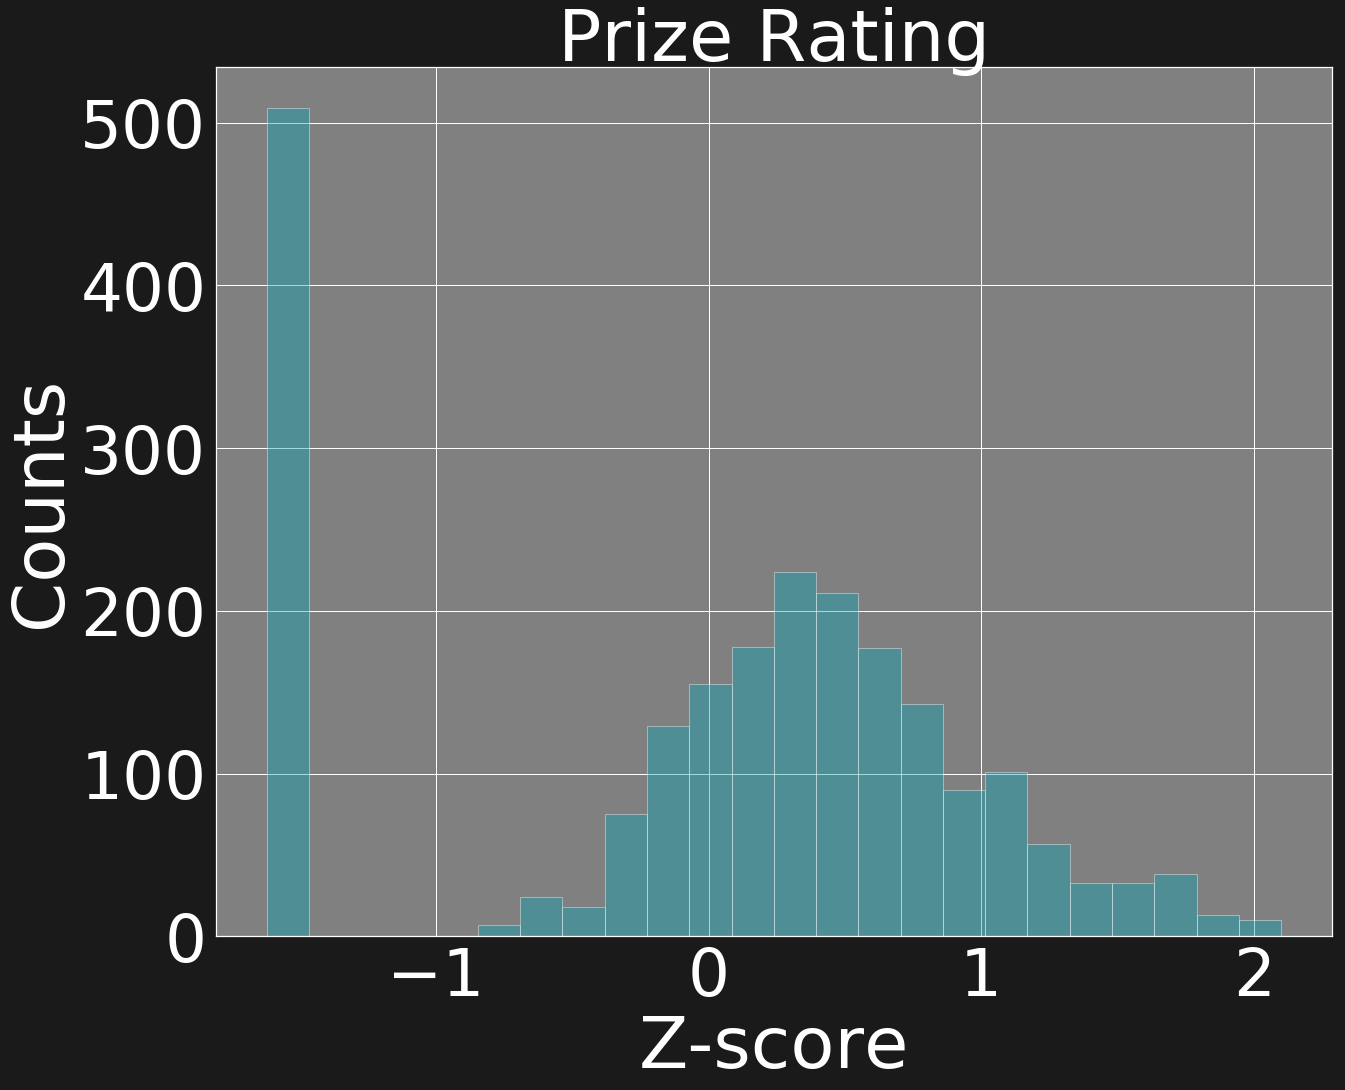

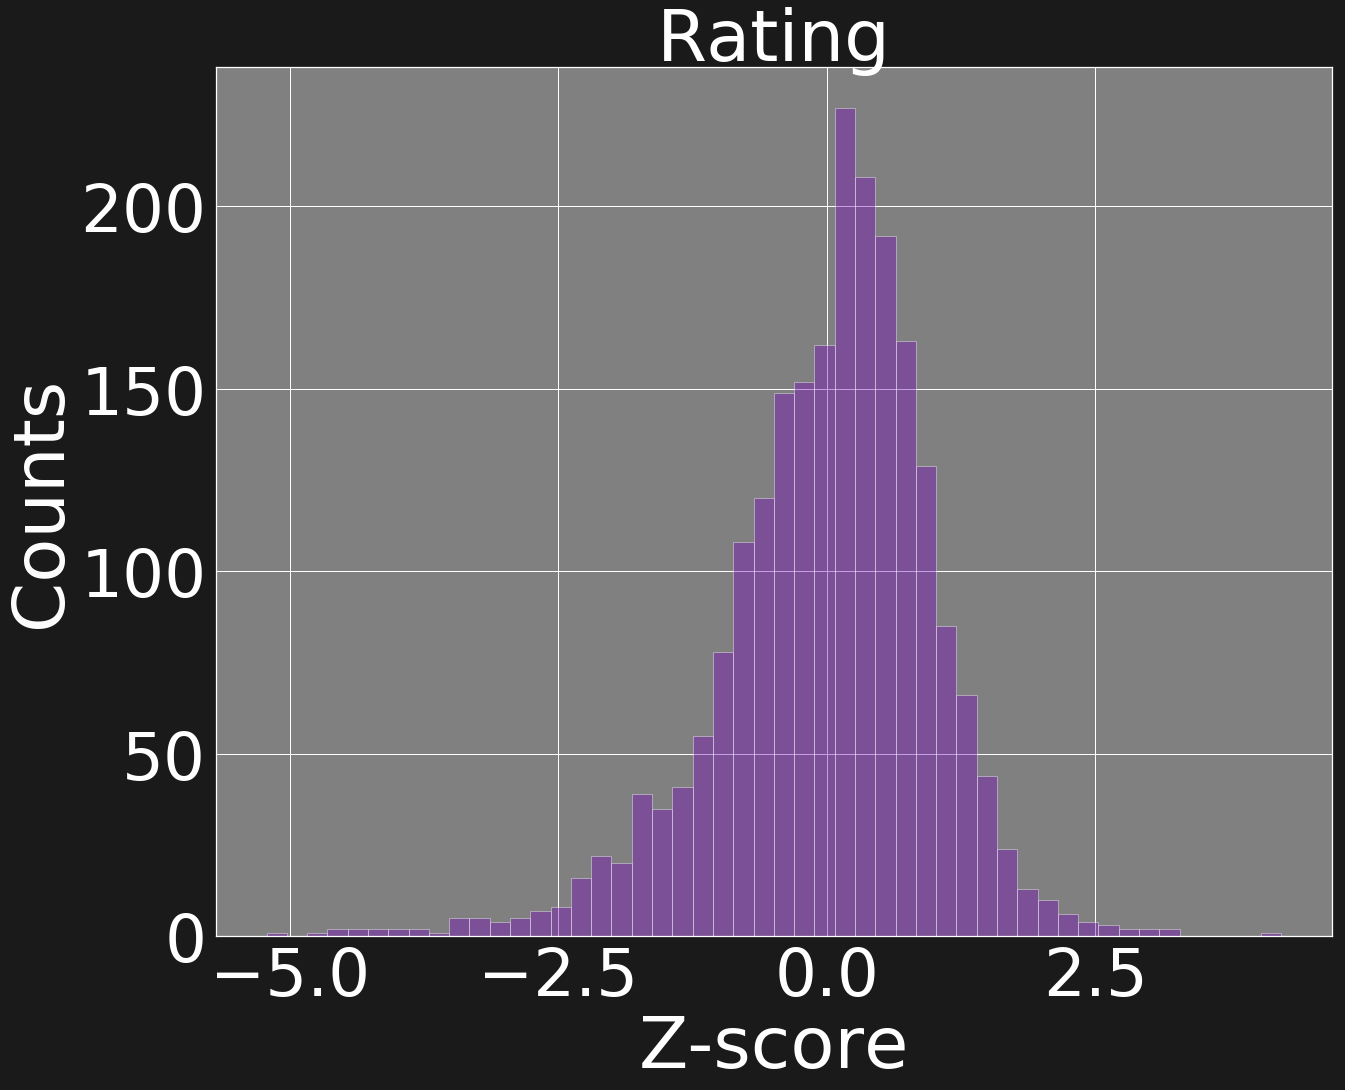

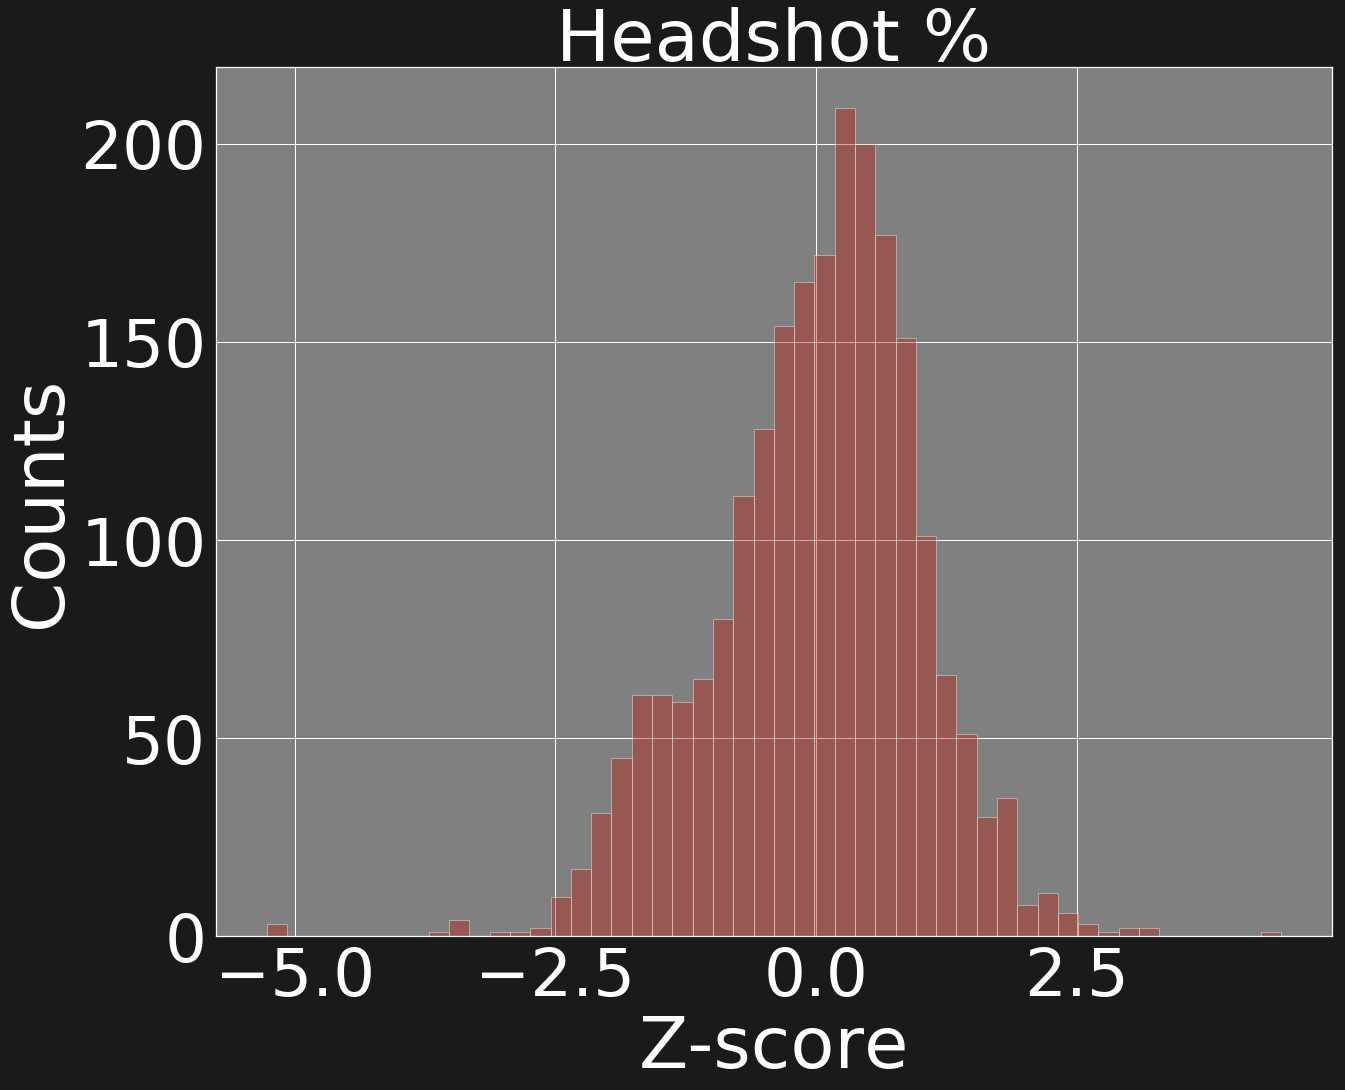

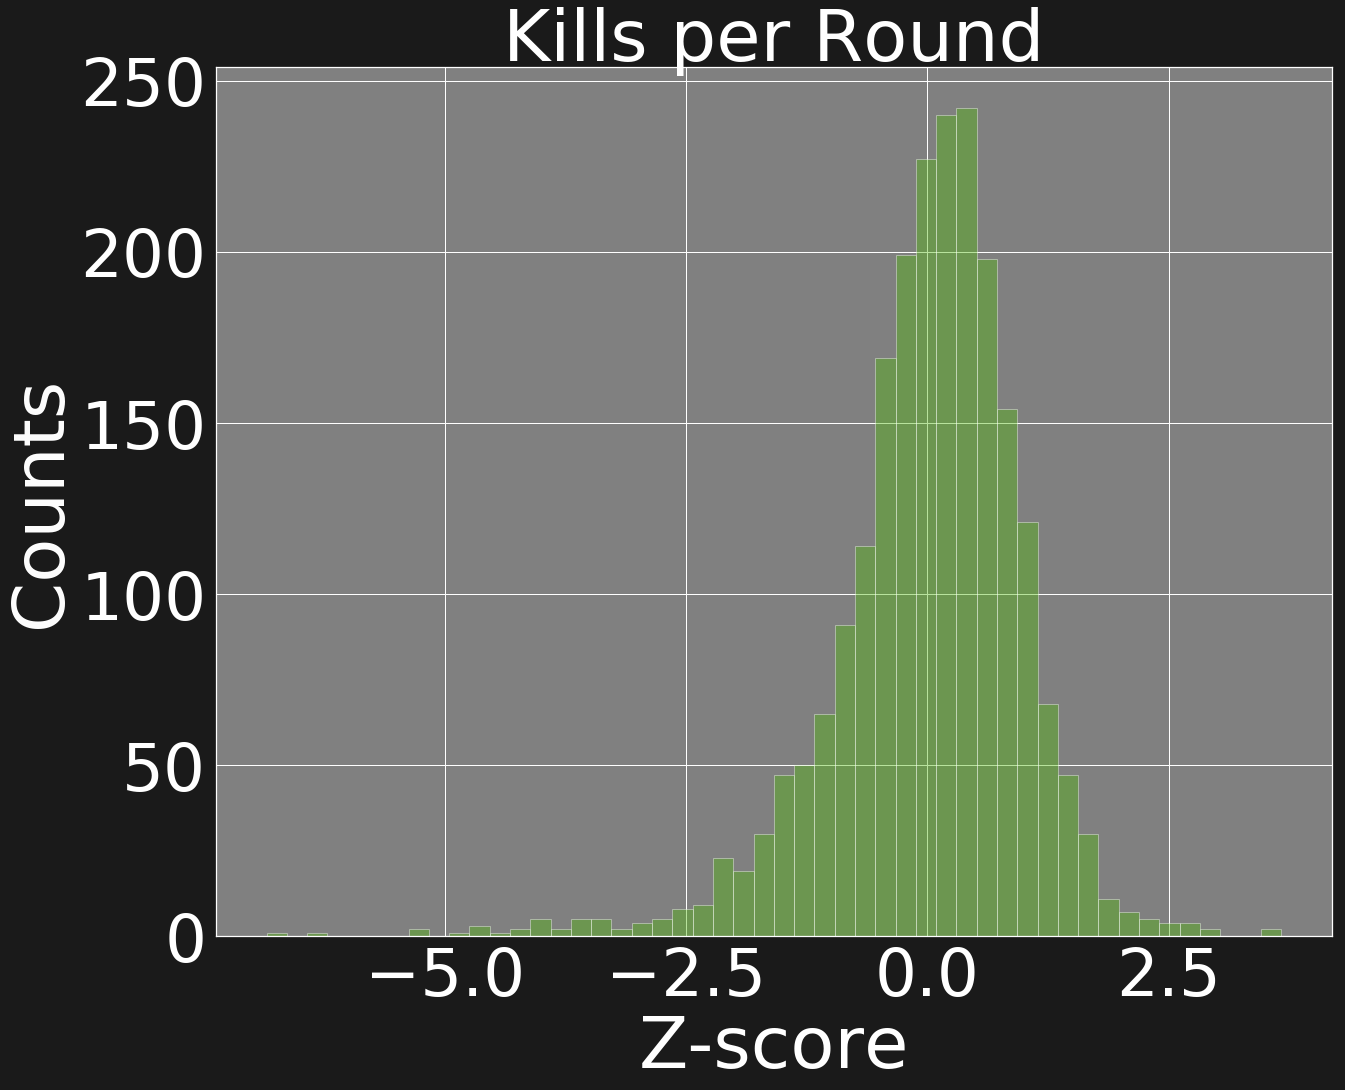

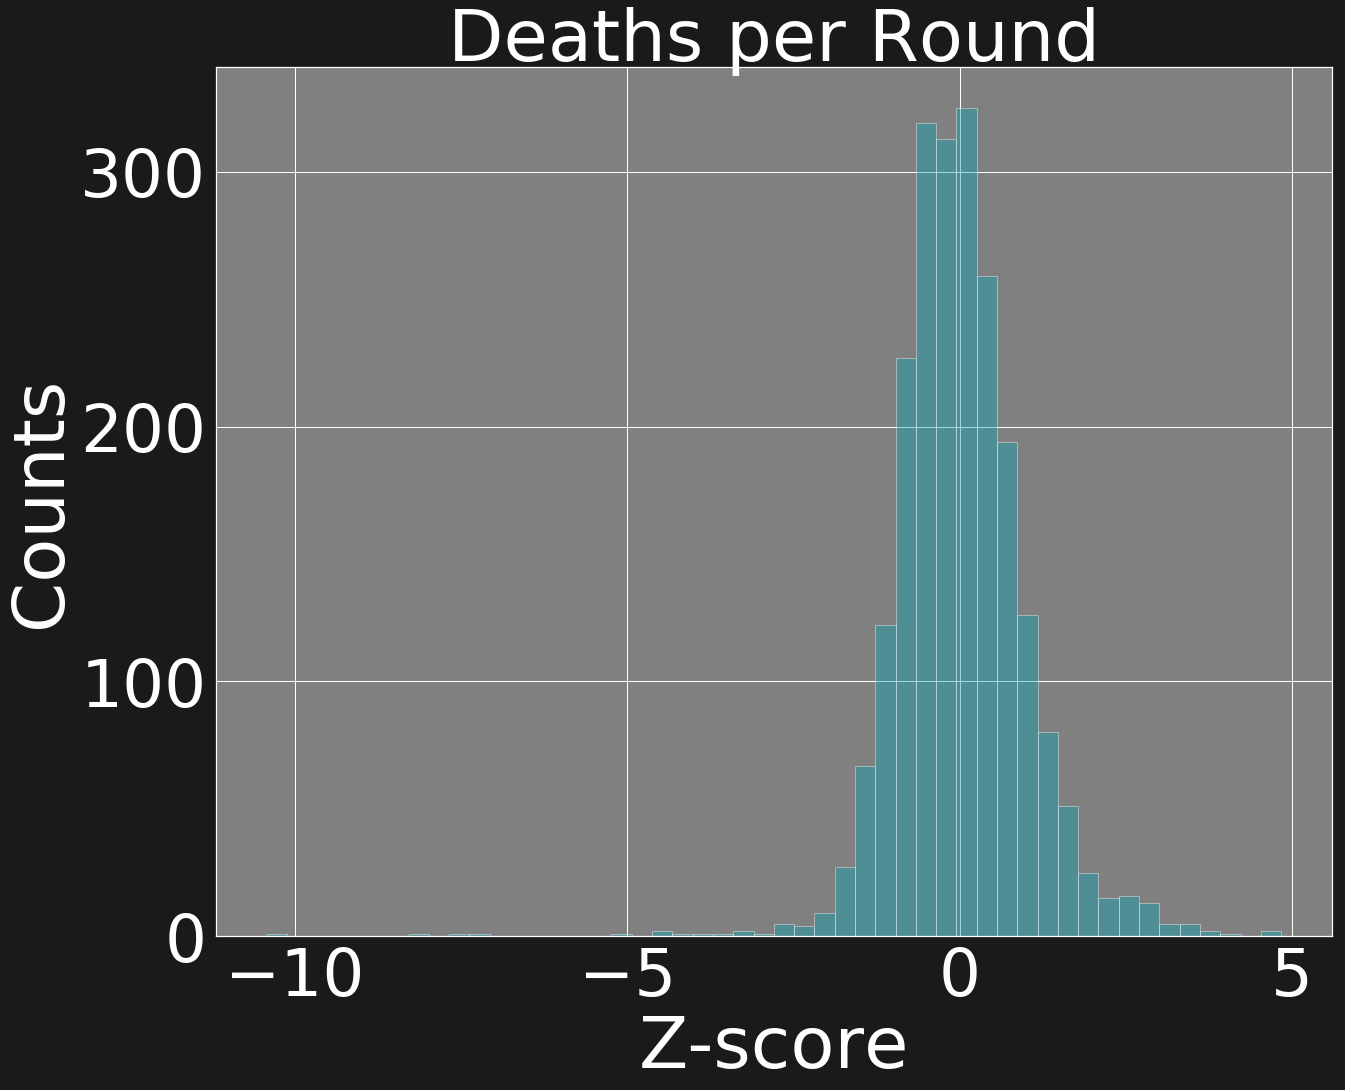

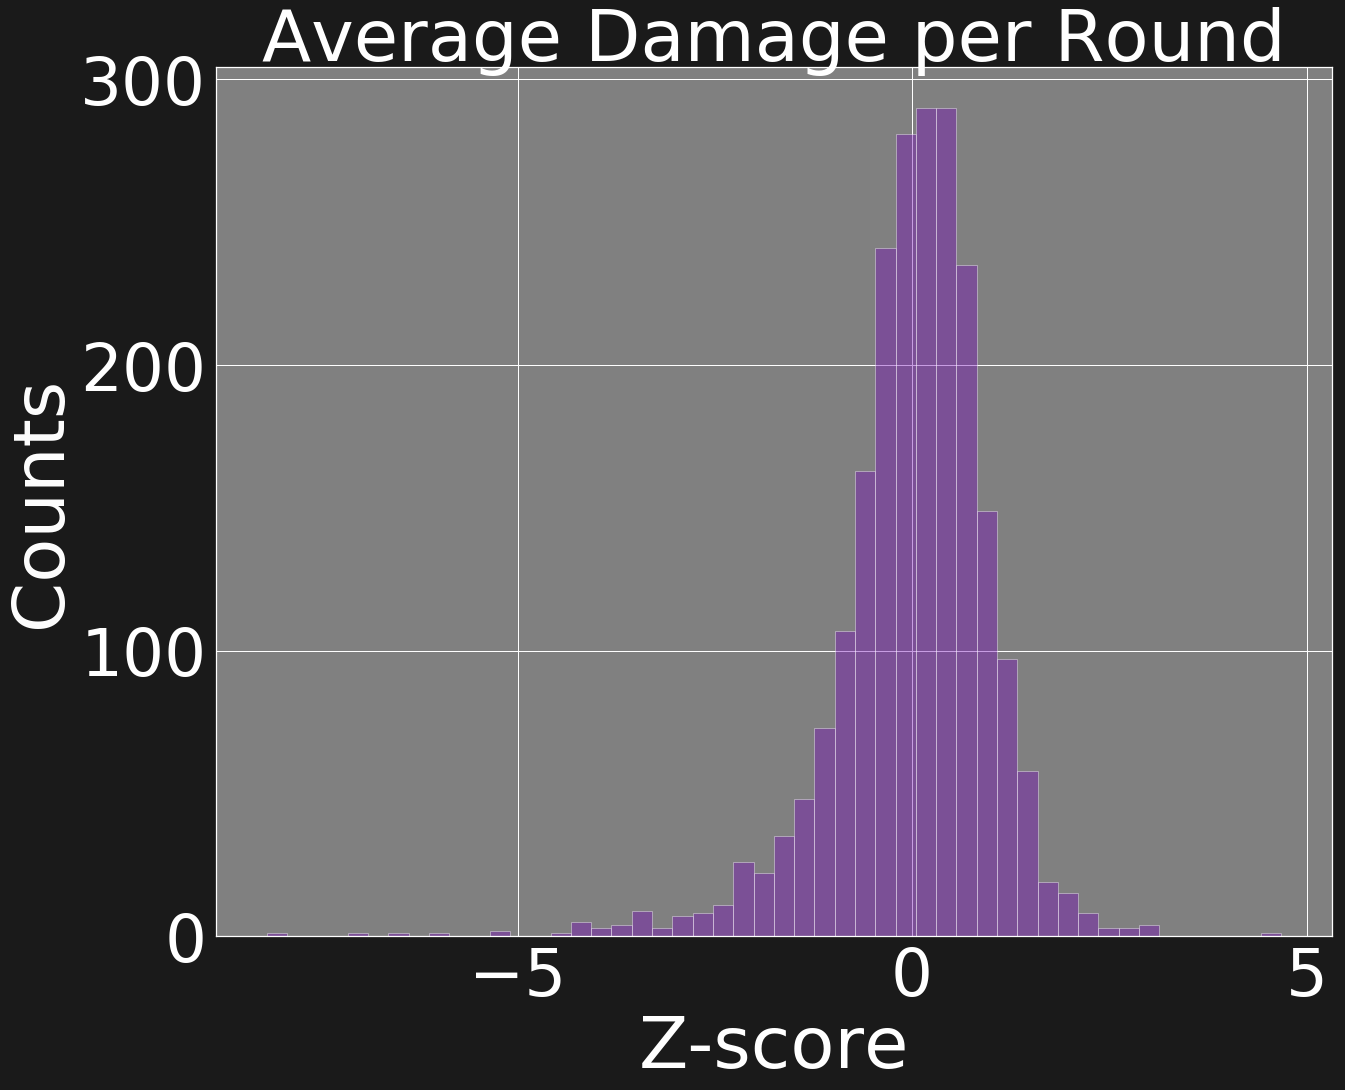

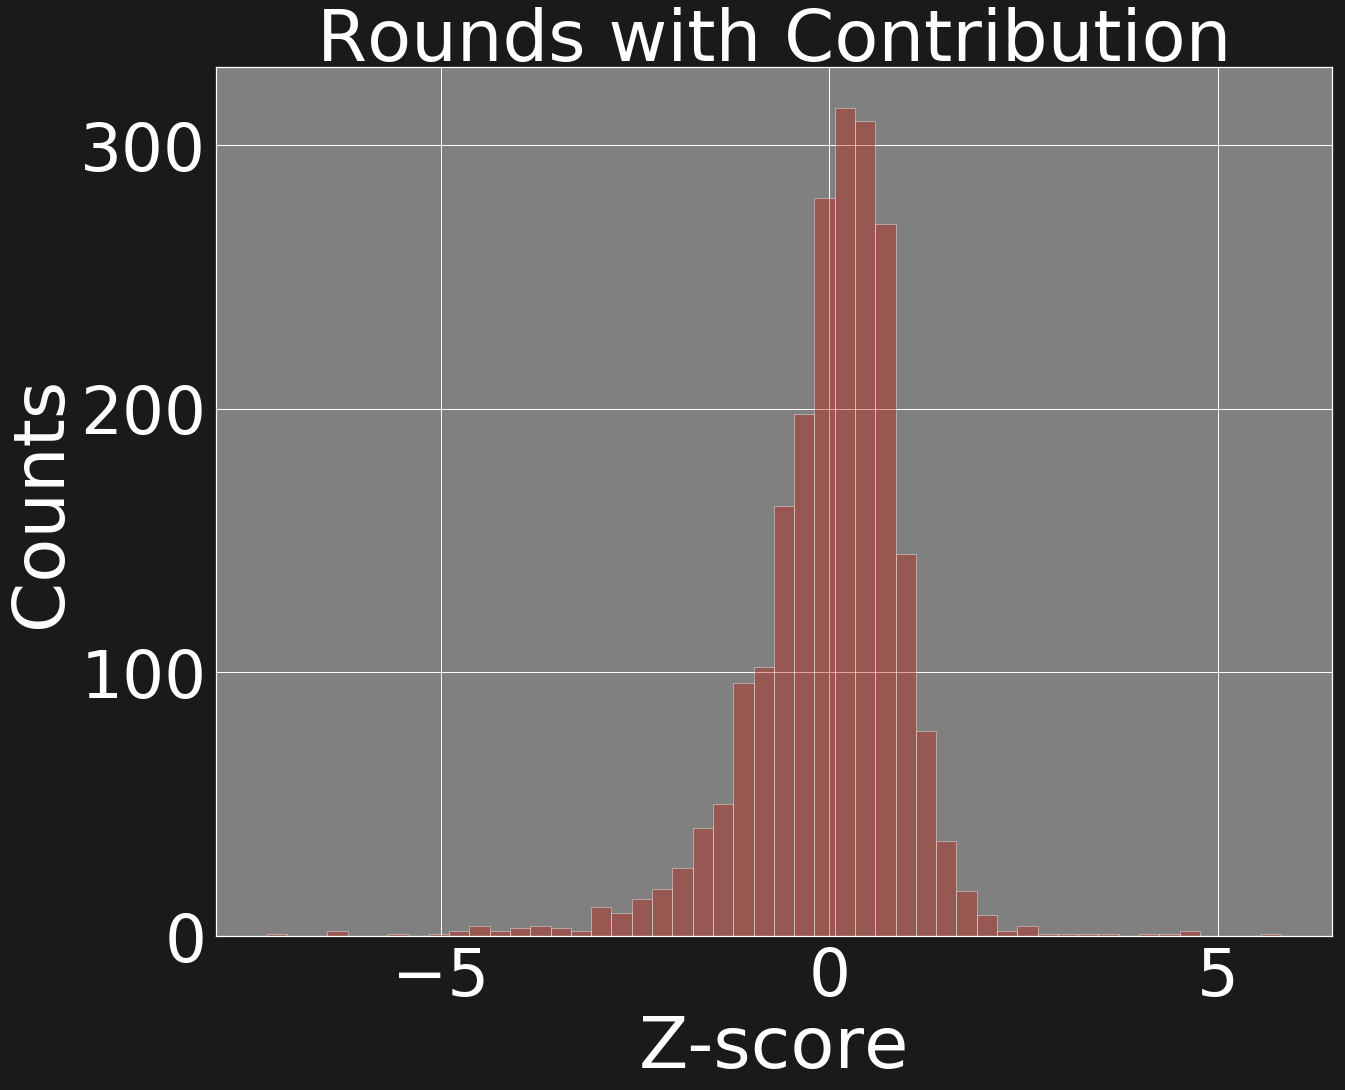

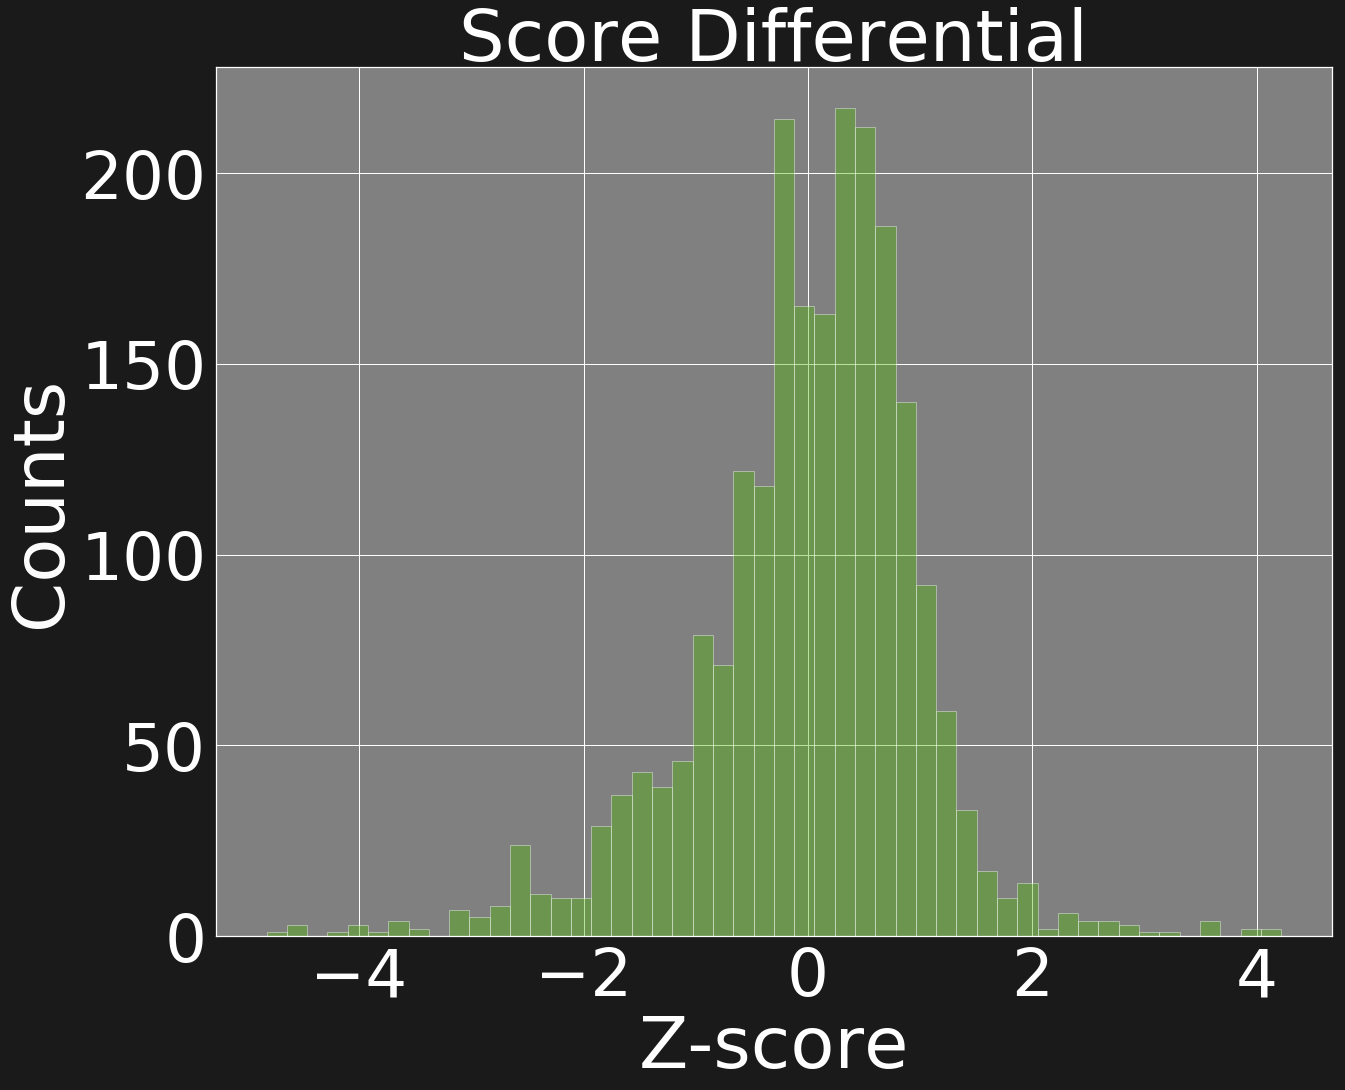

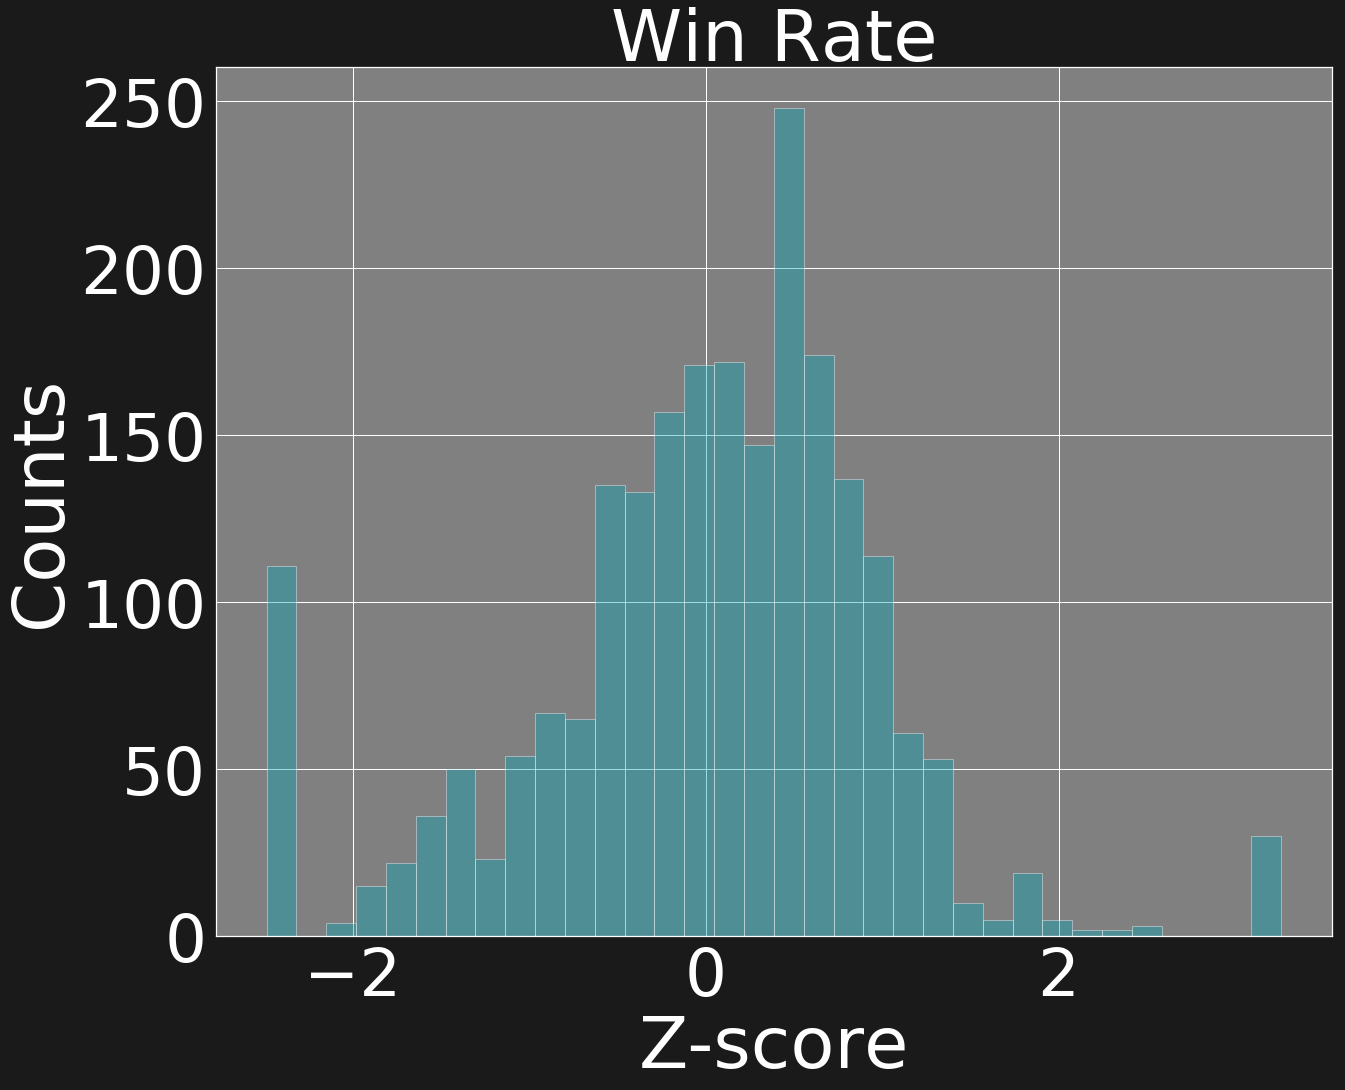

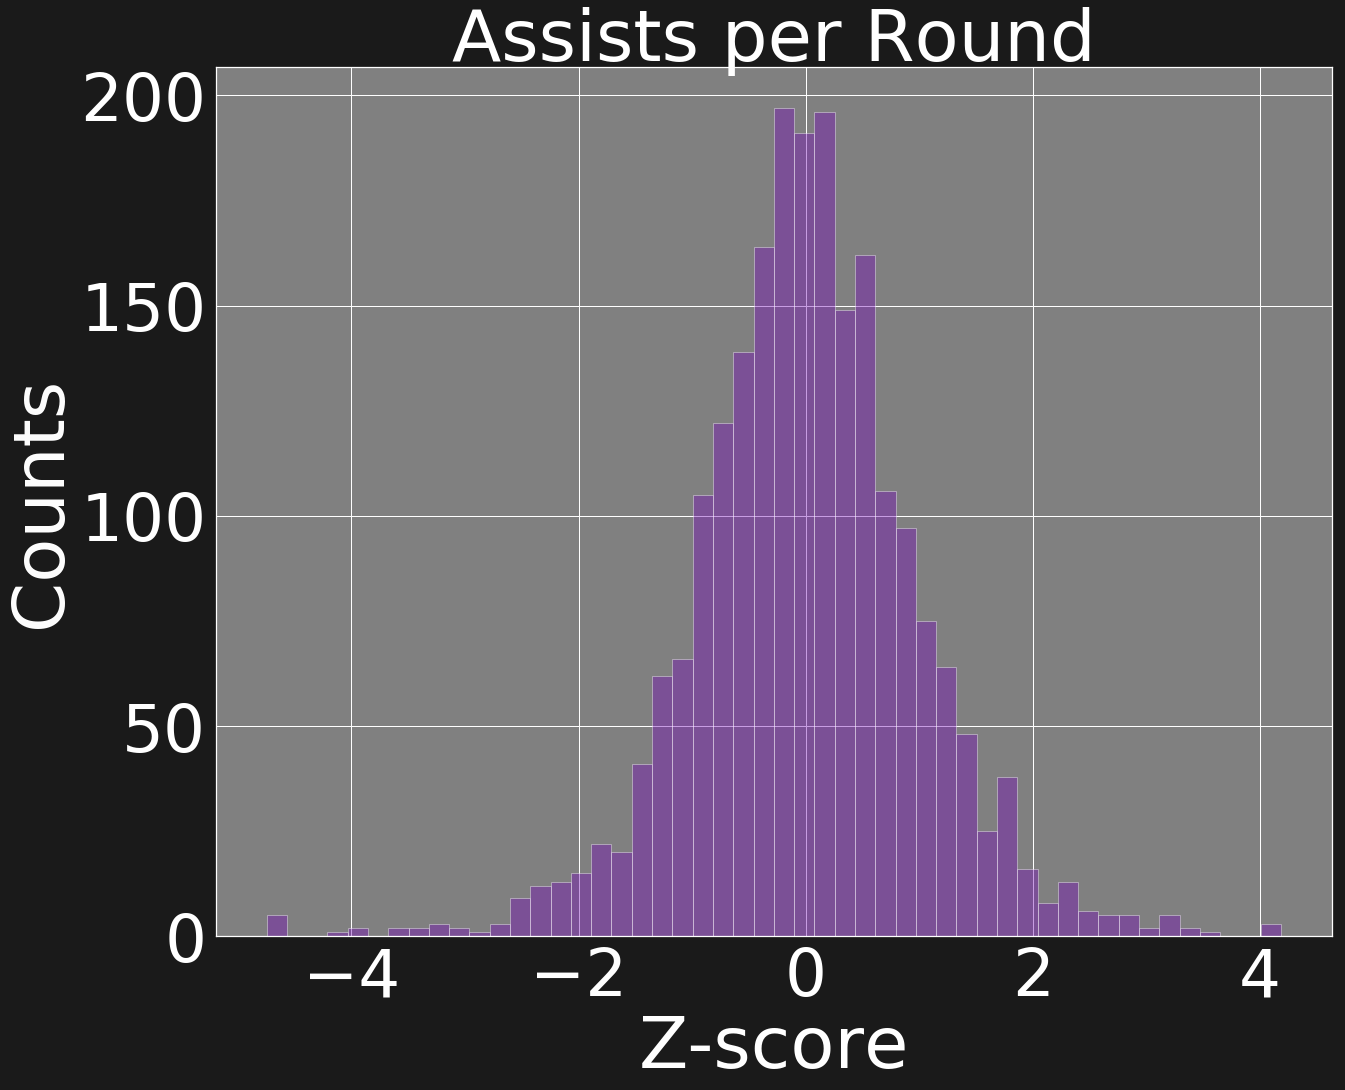

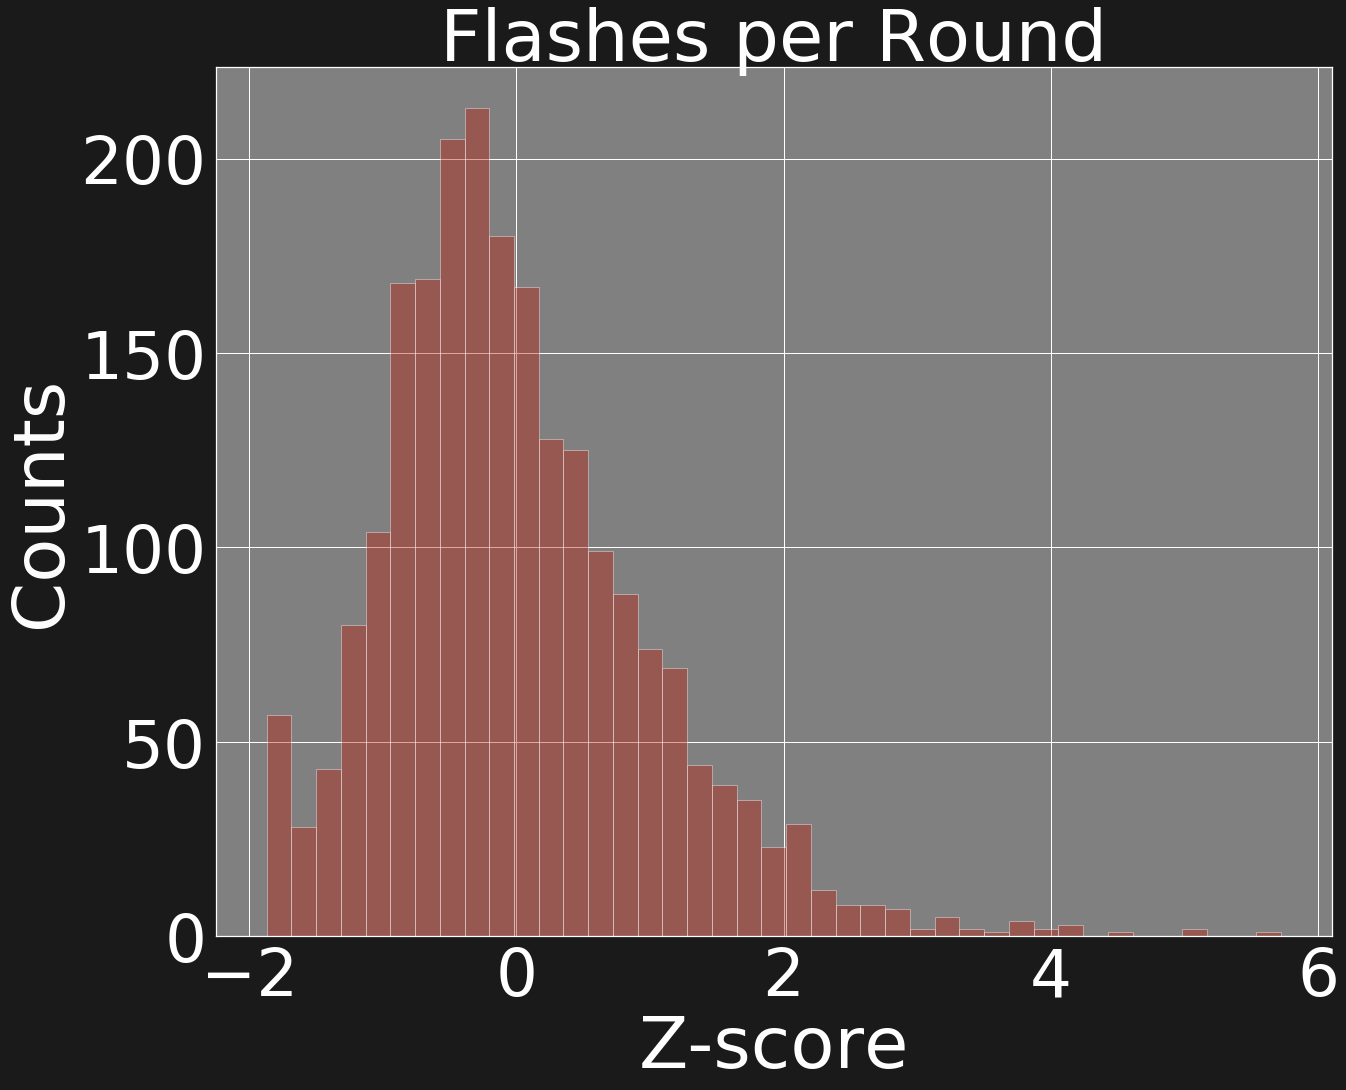

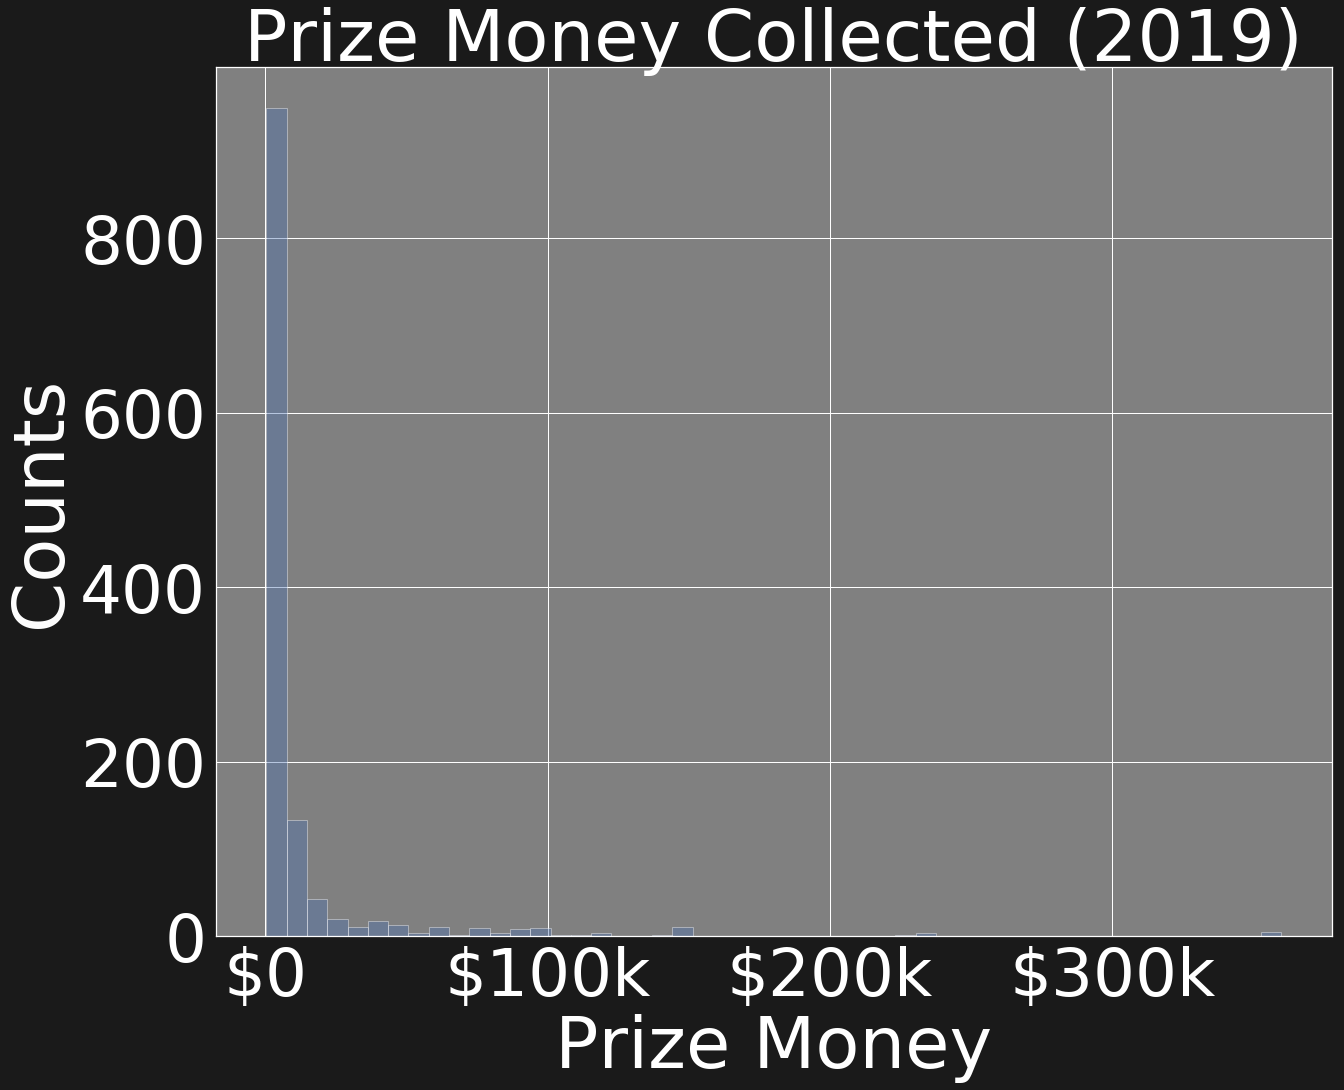

In [10]:
df_aux = pd.DataFrame.from_dict(player_aux,orient='index')

%matplotlib qt
%matplotlib inline

sns.set_style("whitegrid")
sns.set(font_scale=6)

colors = ['#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A', '#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A', '#0AA5B8', '#740AB8', '#B81D0A', '#4FB80A' ]

mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})

                     
ind = 0

names = ['Prize Rating', 'Rating', 'Headshot %', 'Kills per Round', 'Deaths per Round',
       'Average Damage per Round', 'Rounds with Contribution', 'Score Differential', 'Win Rate', 'Assists per Round',
       'Flashes per Round']

for column in df:
    fig = plt.figure(figsize=(20,16))

    mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white",
                     'axes.facecolor':"gray"})

    x = df[column].values
    ax = sns.distplot(x,kde=False,color=colors[ind])
    
    plt.title(names[ind]);
    plt.xlabel('Z-score');
    plt.ylabel('Counts');

    ax.set_facecolor('gray')
    fig.set_facecolor('k')
    
    # plt.savefig(column+'.png', transparent=True, bbox_inches="tight")

    ind = ind + 1 
    
    # sns.kdeplot(x, shade=True);


fig = plt.figure(figsize=(20,16))
x = np.exp( 12.0*df_aux[df_aux['prize']>0.5]['prize'].values ) / 100000.0
ax = sns.distplot(x,kde=False)
ax.set_facecolor('gray')
fig.set_facecolor('k')
plt.xlabel('Prize Money');
plt.ylabel('Counts');
plt.title('Prize Money Collected (2019)');
ax.set_facecolor('gray')
ax.set_xticklabels(['$0','$0','$100k','$200k','$300k','$400k'])
plt.savefig('prize_money.png', transparent=True, bbox_inches="tight")
plt.show()


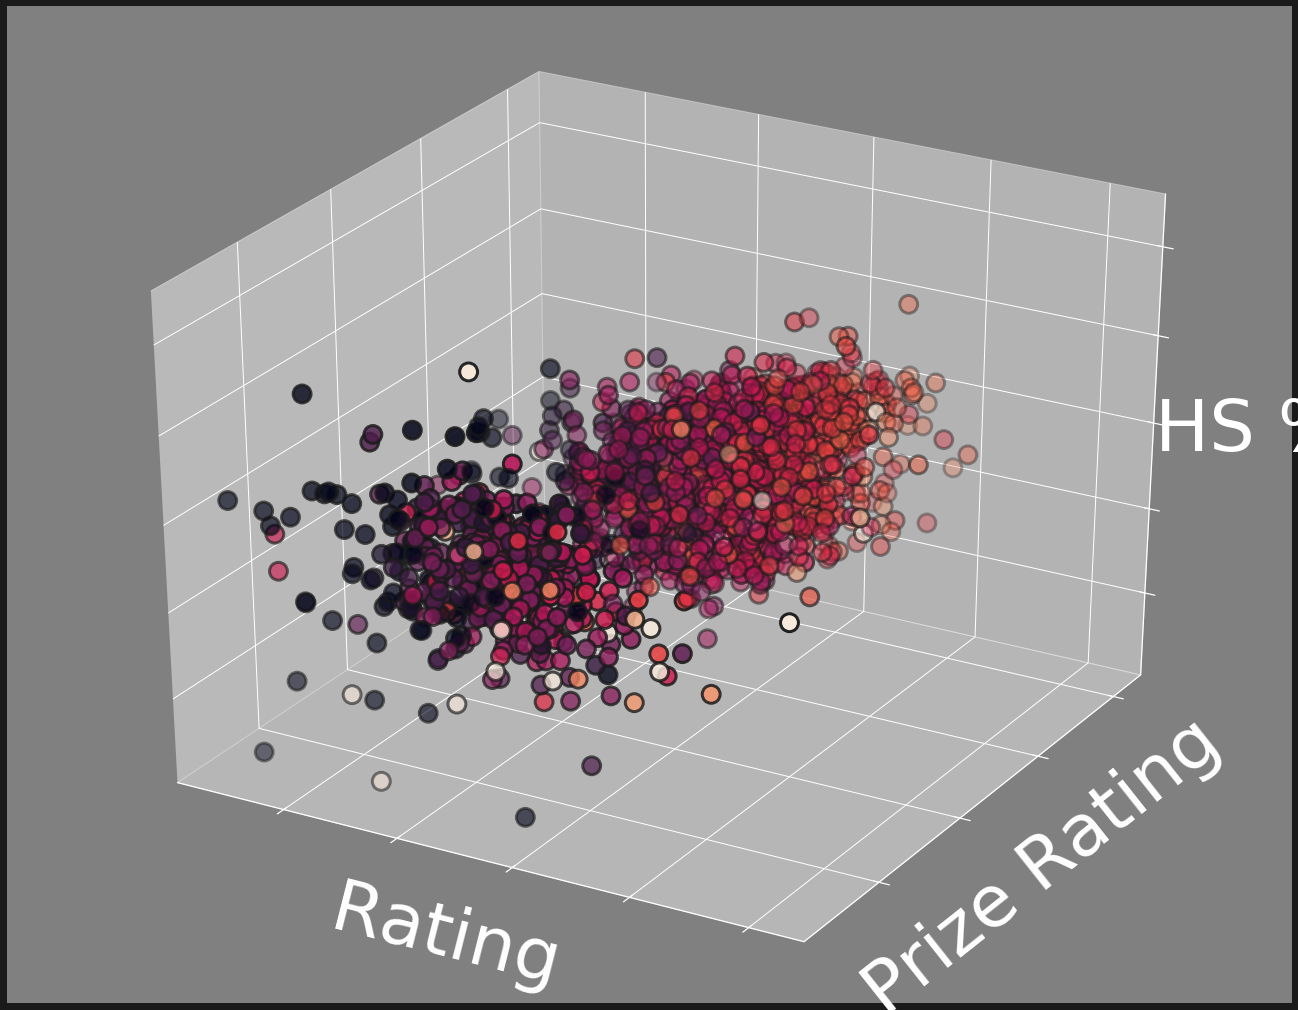

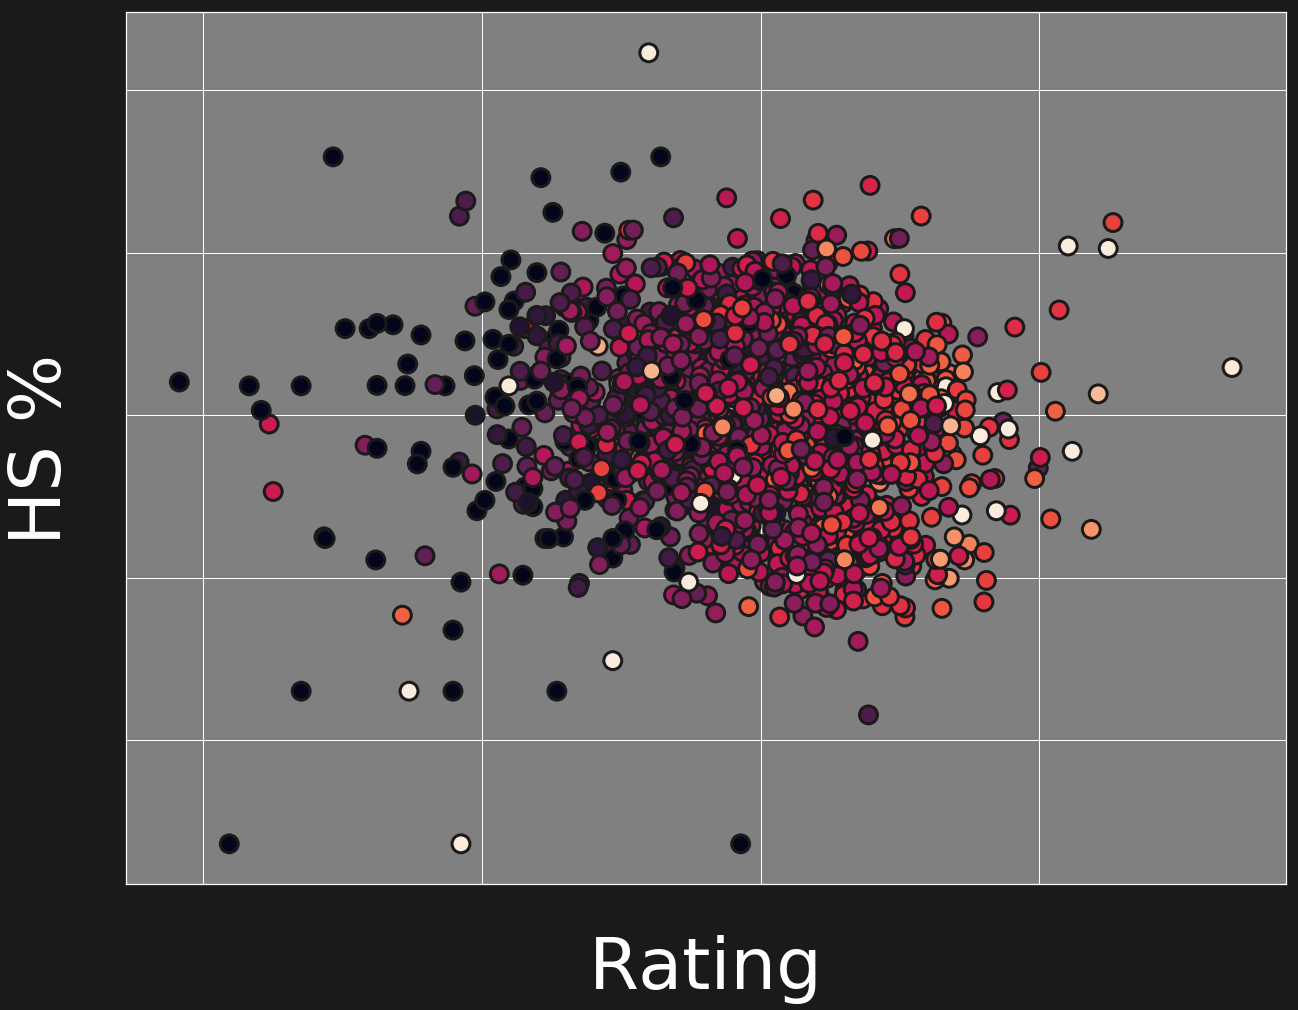

In [14]:
# Three-dimensional 
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rating'], df['prize'], df['hs_perc'], c=df['win_rate'], s=320, linewidths=3, edgecolors='k')

ax.set_facecolor('gray')
fig.set_facecolor('k')


ax.set_xlabel('Rating',labelpad=40)
ax.set_ylabel('Prize Rating',labelpad=40)
ax.set_zlabel('HS %',labelpad=40)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])

plt.tight_layout()

# plt.savefig('3d.png', transparent=True)

# Two-dimensional projection
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
ax.scatter(df['rating'], df['hs_perc'], c=df['win_rate'], s=320, linewidths=3, edgecolors='k')

ax.set_facecolor('gray')
fig.set_facecolor('k')

ax.set_xlabel('Rating',labelpad=40)
ax.set_ylabel('HS %',labelpad=40)

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.tight_layout()

# plt.savefig('2d.png', transparent=True)
